In [154]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing import sequence, text
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Input
from tensorflow.keras.layers import Embedding, LSTM
from tensorflow.keras.layers import Conv1D, Flatten, MaxPooling1D, GlobalMaxPooling1D
from tensorflow.keras import Model
from keras.preprocessing.text import Tokenizer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from keras.optimizers import RMSprop,Adam
import matplotlib.pyplot as plt
%matplotlib inline

In [155]:
data = pd.read_csv('data_preprocessed.csv', delimiter=',', encoding='latin1')

In [156]:
data

,Unnamed: 0,image_name,text_corrected,labels
0,0,image_1.jpg,look friend lightyear sohalikut trend play yea...,0
1,1,image_2.jpeg,best yearchallenge completed le year kudu nare...,0
2,2,image_3.JPG,sam thorne strippin follow follow saw everyone...,0
3,3,image_4.png,year challenge sweet dee edition,2
4,4,image_5.png,year challenge filter hilarious year challenge...,2
...,...,...,...,...
6982,6987,image_6988.jpg,tuesday mardi gras wednesday valentine friday ...,2
6983,6988,image_6989.jpg,must watch movie iti chennai meme maanagaram h...,0
6984,6989,image_6990.png,le talking planning soda junk food complaining...,1
6985,6990,image_6991.jpg,time fantasy one time unless make time arhtist...,0


In [157]:
data.drop('Unnamed: 0', axis=1,inplace=True)
data.head()

,image_name,text_corrected,labels
0,image_1.jpg,look friend lightyear sohalikut trend play yea...,0
1,image_2.jpeg,best yearchallenge completed le year kudu nare...,0
2,image_3.JPG,sam thorne strippin follow follow saw everyone...,0
3,image_4.png,year challenge sweet dee edition,2
4,image_5.png,year challenge filter hilarious year challenge...,2


In [158]:
x = data['text_corrected']
y = data['labels']

In [159]:
print(len(x),len(y))

6987 6987


In [160]:
x[:5]

0    look friend lightyear sohalikut trend play yea...
1    best yearchallenge completed le year kudu nare...
2    sam thorne strippin follow follow saw everyone...
3                    year challenge sweet dee edition 
4    year challenge filter hilarious year challenge...
Name: text_corrected, dtype: object

In [161]:
y[:5]

0    0
1    0
2    0
3    2
4    2
Name: labels, dtype: int64

In [162]:
labels = pd.get_dummies(data.labels)
data = pd.concat([data.text_corrected, labels], axis=1)

In [163]:
# one_hot_encoder = OneHotEncoder()
# y = one_hot_encoder.fit_transform(y.values.reshape(-1,1))
# print(y)
# # type(y)
data

,text_corrected,0,1,2
0,look friend lightyear sohalikut trend play yea...,1,0,0
1,best yearchallenge completed le year kudu nare...,1,0,0
2,sam thorne strippin follow follow saw everyone...,1,0,0
3,year challenge sweet dee edition,0,0,1
4,year challenge filter hilarious year challenge...,0,0,1
...,...,...,...,...
6982,tuesday mardi gras wednesday valentine friday ...,0,0,1
6983,must watch movie iti chennai meme maanagaram h...,1,0,0
6984,le talking planning soda junk food complaining...,0,1,0
6985,time fantasy one time unless make time arhtist...,1,0,0


In [165]:
x = data['text_corrected']
y = data[[0, 1, 2]]

In [166]:
(x, y)

(0       look friend lightyear sohalikut trend play yea...
 1       best yearchallenge completed le year kudu nare...
 2       sam thorne strippin follow follow saw everyone...
 3                       year challenge sweet dee edition 
 4       year challenge filter hilarious year challenge...
                               ...                        
 6982    tuesday mardi gras wednesday valentine friday ...
 6983    must watch movie iti chennai meme maanagaram h...
 6984    le talking planning soda junk food complaining...
 6985    time fantasy one time unless make time arhtist...
 6986    starting point every good idea arhtistic licen...
 Name: text_corrected, Length: 6987, dtype: object,
       0  1  2
 0     1  0  0
 1     1  0  0
 2     1  0  0
 3     0  0  1
 4     0  0  1
 ...  .. .. ..
 6982  0  0  1
 6983  1  0  0
 6984  0  1  0
 6985  1  0  0
 6986  1  0  0
 
 [6987 rows x 3 columns])

In [167]:
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)
y = y.reshape((-1, 1))

ValueError: y should be a 1d array, got an array of shape (6987, 3) instead.

In [168]:
for i in range(0, len(x)): 
    if isinstance(x[i], float): x[i] = str(x[i])
        

<ipython-input-168-dd8d4e59365e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if isinstance(x[i], float): x[i] = str(x[i])


In [169]:
x_train,x_test,y_train, y_test = train_test_split(x,y)

In [170]:
print("train size: " , len(x_train),len(y_train))
print("test size: " , len(x_test),len(y_test))

train size:  5240 5240
test size:  1747 1747


In [171]:
x_train.shape

(5240,)

In [231]:
max_words = 1000
max_len = 30
tok = Tokenizer(num_words=max_words)
tok.fit_on_texts(x_train)
sequences = tok.texts_to_sequences(x_train)
sequences_matrix = sequence.pad_sequences(sequences,maxlen=max_len)

In [232]:
sequences[:5]

[[17, 226, 291],
 [41, 6, 2, 454, 131, 6, 131, 5, 1],
 [164, 66, 825, 309, 121, 77, 455],
 [23, 292, 183, 364, 112, 42, 183],
 [456]]

In [233]:
sequences_matrix

array([[  0,   0,   0, ...,  17, 226, 291],
       [  0,   0,   0, ..., 131,   5,   1],
       [  0,   0,   0, ..., 121,  77, 455],
       ...,
       [  0,   0,   0, ..., 243,  38, 209],
       [  0,   0,   0, ...,  61,  94, 512],
       [  0,   0,   0, ..., 132, 161, 328]], dtype=int32)

In [234]:
def Lstm():
    inputs = Input(name='inputs',shape=[max_len])
    layer = Embedding(max_words,50,input_length=max_len)(inputs)  #vocab, vector space ;output of the Embedding layer is a 2D vector
    layer = LSTM(32)(layer)
    layer = Dense(16,name='FC1')(layer)
    layer = Activation('relu')(layer)
#     layer = Dropout(0.5)(layer)
#     layer = LSTM(32)(layer)
#     layer = Dense(128,name='FC2')(layer)
#     layer = Activation('relu')(layer)
#     layer = Dropout(0.5)(layer)
    layer = Dense(3,name='out_layer')(layer)
    layer = Activation('softmax')(layer)
    model = Model(inputs=inputs,outputs=layer)
    return model

In [235]:
model = Lstm()
model.summary()
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

Model: "functional_38"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inputs (InputLayer)          [(None, 30)]              0         
_________________________________________________________________
embedding_23 (Embedding)     (None, 30, 50)            50000     
_________________________________________________________________
lstm_27 (LSTM)               (None, 32)                10624     
_________________________________________________________________
FC1 (Dense)                  (None, 16)                528       
_________________________________________________________________
activation_44 (Activation)   (None, 16)                0         
_________________________________________________________________
out_layer (Dense)            (None, 3)                 51        
_________________________________________________________________
activation_45 (Activation)   (None, 3)               

In [236]:
history = model.fit(sequences_matrix,y_train,batch_size=128,epochs=10,
          validation_split=0.4)

Epoch 1/10
25/25 [==============================] - 1s 40ms/step - loss: 1.0900 - accuracy: 0.3744 - val_loss: 1.0772 - val_accuracy: 0.3736
Epoch 2/10
25/25 [==============================] - 1s 28ms/step - loss: 1.0766 - accuracy: 0.4087 - val_loss: 1.0768 - val_accuracy: 0.3893
Epoch 3/10
25/25 [==============================] - 1s 27ms/step - loss: 1.0686 - accuracy: 0.4478 - val_loss: 1.0791 - val_accuracy: 0.3731
Epoch 4/10
25/25 [==============================] - 1s 31ms/step - loss: 1.0498 - accuracy: 0.4930 - val_loss: 1.0847 - val_accuracy: 0.3669
Epoch 5/10
25/25 [==============================] - 1s 36ms/step - loss: 1.0068 - accuracy: 0.5032 - val_loss: 1.1069 - val_accuracy: 0.3602
Epoch 6/10
25/25 [==============================] - 1s 30ms/step - loss: 0.9430 - accuracy: 0.5458 - val_loss: 1.1960 - val_accuracy: 0.3430
Epoch 7/10
25/25 [==============================] - 1s 28ms/step - loss: 0.8807 - accuracy: 0.5840 - val_loss: 1.3170 - val_accuracy: 0.3406
Epoch 8/10
25

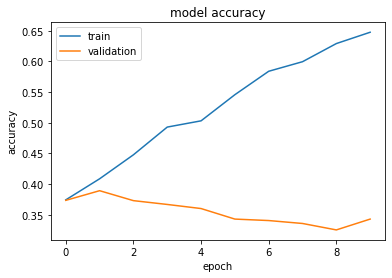

In [237]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [200]:
history.history

{'loss': [1.0925816297531128,
  1.085159420967102,
  1.0799169540405273,
  1.0745195150375366,
  1.0660213232040405,
  1.0530081987380981,
  1.0351355075836182,
  1.0068858861923218,
  0.9786523580551147,
  0.9530715942382812],
 'accuracy': [0.37380725145339966,
  0.3914599120616913,
  0.4002862572669983,
  0.41030535101890564,
  0.4284351170063019,
  0.44990459084510803,
  0.4604007601737976,
  0.494751900434494,
  0.5190839767456055,
  0.541269063949585],
 'val_loss': [1.0786218643188477,
  1.076094150543213,
  1.0760401487350464,
  1.0737676620483398,
  1.0745773315429688,
  1.0797853469848633,
  1.0883725881576538,
  1.1097607612609863,
  1.1441364288330078,
  1.176507592201233],
 'val_accuracy': [0.402671754360199,
  0.40744274854660034,
  0.3883587718009949,
  0.3998091518878937,
  0.38263359665870667,
  0.3835877776145935,
  0.3778626024723053,
  0.37118321657180786,
  0.3520992398262024,
  0.347328245639801]}

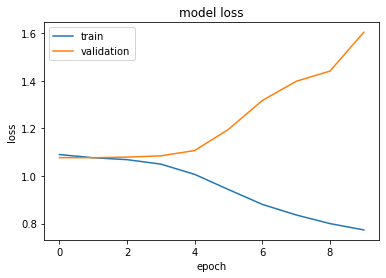

In [238]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()